# US09

### Introdução:
Análise Estatística de Consumo de Água em Parques Verdes

A User Story US09, visa fornecer aos Gerentes de Espaços Verdes (GSM) informações precisas sobre os custos referentes ao consumo de água em espaços verdes específicos. Essa análise permite uma gestão eficiente dos gastos relacionados à água, garantindo uma alocação adequada de recursos financeiros.

Para atender a essa demanda, a US09 propõe uma série de funcionalidades implementadas por meio de código Python, utilizando o conjunto de dados disponibilizado no arquivo "water_consumption.csv". Este arquivo registra o consumo diário de água (em metros cúbicos - m³) desde a abertura de cada parque verde. O custo da água é de 0,7 AC/m³, até um consumo de 1000m³/mês, sendo aplicada uma taxa adicional de 15% para níveis de consumo mais elevados.
___

### Funcionalidades:

1. Barplot Representando o Consumo Mensal de Água: Um gráfico de barras é gerado para representar o consumo mensal de água em um determinado parque verde. O usuário especifica o ano, o período de tempo (mês inicial e final) e a identificação do parque.

2. Média dos Custos Mensais de Consumo de Água: Calcula a média dos custos mensais relacionados ao consumo de água para cada parque verde. O usuário define o número de parques a serem analisados e a identificação de cada parque.

3. Análise Estatística Comparativa: Realiza uma análise comparativa entre o parque com o maior e o menor consumo de água. As seguintes estatísticas são calculadas e comparadas para esses dois parques:
   - Média
   - Mediana
   - Desvio padrão
   - Coeficiente de assimetria

Além disso, a análise inclui a construção de tabelas de frequência relativa e absoluta para os dados classificados em 5 classes. Também são identificados outliers em cada conjunto de dados, considerando a definição de valores que se desviam da mediana em mais de 1,5 vezes o intervalo interquartil. Finalmente, os dados são representados graficamente através de histogramas com 10 e 100 classes para cada parque.

Essas funcionalidades fornecem uma compreensão abrangente do consumo de água nos parques verdes, permitindo uma gestão eficaz dos recursos financeiros e uma tomada de decisão informada pelos Gerentes de Espaços Verdes.

___

### Código e Resultados:


Average Monthly Costs for Parks ['Cidade', 'Covelo'] : 1588.5896319125814 

Park with highest consumption: Cidade
Mean: 116.24058906230263
Median: 85.995
Standard Deviation: 71.72487101415582
Coefficient of Skewness: 1.2650669970392812

Park with lowest consumption: ArcaAgua
Mean: 8.99599282623465
Median: 6.7718554315
Standard Deviation: 4.852369347899769
Coefficient of Skewness: 1.3750833264767743

Frequency Table (5 Classes):
             Absolute Frequency  Relative Frequency
Consumption                                        
0 - 184                    2122            0.966743
184 - 369                    70            0.031891
369 - 553                     2            0.000911
553 - 738                     0            0.000000
738 - 923                     1            0.000456

Outliers:
                   Park  Year  Month  Day  Consumption
Park                                                  
ArcaAgua 261   ArcaAgua  2023      3    7    30.555000
         651   ArcaAgua  202

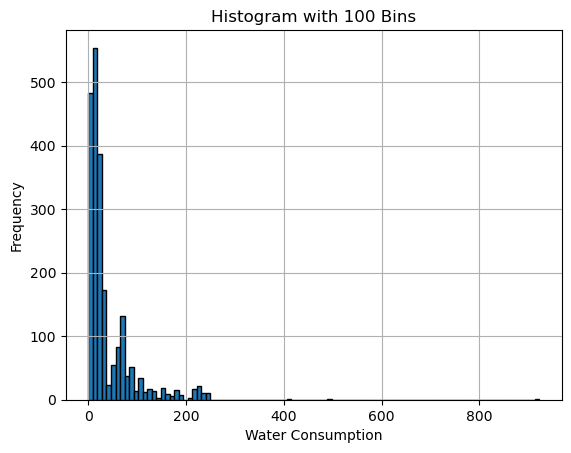

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados do arquivo CSV
data = pd.read_csv('../datasetsMATCP/water_consumption.csv', sep=';', decimal=',')

def monthly_water_consumption(data, year, start_month, end_month, park):
    monthly_water_consumption = data[(data["Year"] == year) &
                         (data["Month"].between(start_month, end_month)) &
                         (data["Park"] == park)]
    return monthly_water_consumption

# Sample user specifications
year = 2023
start_month = 1 
end_month = 12 
park_id = 'Cidade'

monthly_water_consumption = monthly_water_consumption(data, year, start_month, end_month, park_id)

# Step 3: Group the filtered data by month and aggregate the water consumption
monthly_consumption = monthly_water_consumption.groupby('Month')['Consumption'].sum().reset_index()

# Step 4: Plot the aggregated water consumption for each month using Seaborn
sns.barplot(x='Month', y='Consumption', data=monthly_consumption)
plt.title('Monthly Water Consumption')
plt.xlabel('Month')
plt.ylabel('Water Consumption')
plt.grid(True)
plt.show()

def calculate_monthly_costs(data, park_ids):
    monthly_costs_total = 0
    for park_id in park_ids:
        park_data = data[data['Park'] == park_id]
        monthly_consumption = park_data.groupby(['Year', 'Month'])['Consumption'].sum()
        monthly_costs = (monthly_consumption * 0.7).reset_index(name='Cost')
        # Apply additional charge for consumption over 1000m3
        monthly_costs['Cost'] = monthly_costs['Cost'].apply(lambda x: x * 1.15 if x > 1000 else x)
        average_costs = monthly_costs['Cost'].mean()
        monthly_costs_total += average_costs
    return monthly_costs_total / len(park_ids)

park_ids = ['Cidade', 'Covelo']
average_costs_multiple_parks = calculate_monthly_costs(data, park_ids)

print("Average Monthly Costs for Parks", park_ids, ":", average_costs_multiple_parks, "\n")

def statistical_analysis(data):
    # Cálculos estatísticos para os parques com maior e menor consumo de água
    grouped_data = data.groupby('Park')['Consumption']
    max_consumption_park = grouped_data.describe().loc[grouped_data.describe()['max'].idxmax()]
    min_consumption_park = grouped_data.describe().loc[grouped_data.describe()['min'].idxmin()]

    max_park_id = max_consumption_park.name
    min_park_id = min_consumption_park.name

    print("Park with highest consumption:", max_park_id)
    print("Mean:", max_consumption_park['mean'])
    print("Median:", max_consumption_park['50%'])
    print("Standard Deviation:", max_consumption_park['std'])
    print("Coefficient of Skewness:", 3 * (max_consumption_park['mean'] - max_consumption_park['50%']) / max_consumption_park['std'])

    print("\nPark with lowest consumption:", min_park_id)
    print("Mean:", min_consumption_park['mean'])
    print("Median:", min_consumption_park['50%'])
    print("Standard Deviation:", min_consumption_park['std'])
    print("Coefficient of Skewness:", 3 * (min_consumption_park['mean'] - min_consumption_park['50%']) / min_consumption_park['std'])

statistical_analysis(data)

def frequency_table(data, num_classes):
    consumption_range = data['Consumption'].max() - data['Consumption'].min()
    class_width = consumption_range / num_classes

    intervals = [(data['Consumption'].min() + i * class_width, data['Consumption'].min() + (i + 1) * class_width) for i in range(num_classes)]
    intervals[-1] = (intervals[-1][0], data['Consumption'].max() + 1)

    frequency_table = pd.cut(data['Consumption'], bins=[interval[0] for interval in intervals] + [intervals[-1][1]], right=False, include_lowest=True, labels=[f'{int(interval[0])} - {int(interval[1])}' for interval in intervals])

    frequency_absolute = frequency_table.value_counts().sort_index()
    frequency_relative = frequency_absolute / len(data)
    
    return pd.DataFrame({'Absolute Frequency': frequency_absolute, 'Relative Frequency': frequency_relative})

# Para um número fixo de 5 classes
freq_table_5_classes = frequency_table(data, 5)
print("\nFrequency Table (5 Classes):")
print(freq_table_5_classes)

def detect_outliers(data):
    # Calculando o intervalo interquartil
    Q1 = data['Consumption'].quantile(0.25)
    Q3 = data['Consumption'].quantile(0.75)
    IQR = Q3 - Q1

    # Definindo os limites superior e inferior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Verificando outliers
    outliers = data[(data['Consumption'] < lower_bound) | (data['Consumption'] > upper_bound)]
    return outliers

# Verificando outliers para cada parque
outliers = data.groupby('Park').apply(detect_outliers)
print("\nOutliers:")
print(outliers)

def plot_histogram(data, num_bins):
    plt.hist(data['Consumption'], bins=num_bins, edgecolor='black')
    plt.title(f'Histogram with {num_bins} Bins')
    plt.xlabel('Water Consumption')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Histograma com 10 aulas
plot_histogram(data, 10)

# Histograma com 100 aulas
plot_histogram(data, 100)

### Análise e interpretação dos resultados:
Primeiramente, ao analisar o boxplot do parque "Cidade" é possivel verificar que o consumo de água é superior na época de verão relativamente à restante época no ano.
Ao comparar os dois parques, notamos uma diferença significativa nos níveis de consumo médio. O Parque da Cidade apresenta um consumo médio de água muito mais alto, com uma média de aproximadamente 116,24 m³, em comparação com o Parque Arca Agua, que tem um consumo médio de apenas cerca de 8,99 m³. Isso sugere que há uma disparidade marcante na demanda de água entre esses dois locais.
Além disso, ao observar os histogramas de distribuição de consumo de água, podemos notar que o parque "Cidade" tem uma frequência de aproximadamente 250 em 10 classes de consumo, enquanto o parque "ArcaAgua" tem uma frequência de cerca de 1.0, indicando uma distribuição mais uniforme de consumo ao longo de várias faixas de consumo. Isso sugere que o parque "Cidade" tem uma concentração maior de meses com alto consumo de água, possivelmente devido a fatores como o tamanho do parque, o número de visitantes ou atividades específicas que requerem mais água.
Analisando as tabelas de frequência relativa e absoluta, podemos observar como os dados estão distribuídos em diferentes faixas de consumo. No parque "Cidade", a maioria dos registros de consumo se concentra nas faixas de menor consumo, com uma pequena porcentagem de registros nas faixas de consumo mais alto. Já no parque "ArcaAgua", a quase totalidade dos registros está na faixa de menor consumo, com praticamente nenhum registro nas faixas de consumo mais alto. Isso reforça a ideia de que o parque "Cidade" tem uma distribuição mais variada de consumo ao longo do tempo, enquanto o parque "ArcaAgua" tem uma distribuição mais concentrada em valores baixos de consumo.
Outro aspecto importante a considerar são os outliers, que são valores extremos que se desviam significativamente da maioria dos dados. No parque "Cidade", identificamos alguns outliers com valores muito altos de consumo, enquanto no parque "ArcaAgua", também há outliers, mas com valores significativamente menores. Isso pode indicar eventos ou condições excepcionais que levaram a um consumo atípico de água em ambos os parques.
Em resumo, os resultados da análise destacam a importância de compreender os padrões de consumo de água em diferentes contextos e como eles podem variar entre diferentes áreas verdes. Essas informações são essenciais para o gerenciamento eficiente dos recursos hídricos e para a implementação de medidas que visem a conservação e o uso sustentável da água em espaços públicos.

## Fórmulas Usadas:

### Barplot Water Consumption

$$
\text{{Monthly consumption}} = \sum_{{i=\text{{start_month}}}}^{{\text{{end_month}}}} \text{{Consumption}}_i
$$
### Calculate Monthly Costs

$$
\text{{Monthly cost}} = \text{{Consumption}} \times 0.7
$$

$$
\text{{If consumption}} > 1000: \quad \text{{Monthly cost}} = \text{{Monthly cost}} \times 1.15
$$

$$
\text{{Average costs}} = \frac{1}{n} \sum_{{i=1}}^{n} \text{{Monthly cost}}_i
$$

### Calculate Statistics
$$
\text{{Mean}} = \frac{1}{n} \sum_{{i=1}}^{n} x_i
$$

$$
\text{{Median}} = \text{{middle value of sorted data}}
$$

$$
\text{{Standard Deviation}} = \sqrt{\frac{1}{n} \sum_{{i=1}}^{n} (x_i - \text{{Mean}})^2}
$$

$$
\text{{Coefficient of Skewness}} = \frac{\frac{1}{n} \sum_{{i=1}}^{n} (x_i - \text{{Mean}})^3}{\text{{Standard Deviation}}^3}
$$

### Relative and Absolute Frequency Tables
$$
\text{{Classes}} = \text{{np.linspace}}(\text{{min}}, \text{{max}}, \text{{num}})
$$

$$
\text{{Frequency}} = \text{{pd.cut}}(\text{{data}}, \text{{classes}}).\text{{value_counts().sort_index()}}
$$

### Check for Outliers
$$
\text{{IQR}} = \text{{percentile}}_{{75}} - \text{{percentile}}_{{25}}
$$

$$
\text{{Outliers}} = \text{{data}}[ (\text{{data}} < (\text{{percentile}}_{{25}} - 1.5 \times \text{{IQR}})) \,|\, (\text{{data}} > (\text{{percentile}}_{{75}} + 1.5 \times \text{{IQR}})) ]
$$


---






# US10

### Introdução:
Como Gerente de Serviços do Parque (GSM), é fundamental compreender as preferências dos usuários e entender quais equipamentos são mais utilizados diariamente. Para alcançar esse objetivo, uma solução foi implementada: um dispositivo eletrônico na saída do parque permite que os usuários indiquem quais equipamentos utilizaram durante o dia. Essas informações são registradas no arquivo "EquipmentUsed.csv".

A User Story US10 visa fornecer insights sobre o uso diário dos equipamentos do parque. Ao coletar dados das escolhas dos usuários, a GSM pode identificar as preferências e padrões de uso dos equipamentos, ajudando na tomada de decisões relacionadas à manutenção, melhorias e adições de novos equipamentos no parque.

Para visualizar e compreender facilmente esses dados, a funcionalidade inclui a criação de um gráfico de pizza (pie chart) que representa a porcentagem de uso de cada equipamento. Isso permite uma rápida análise visual da popularidade de cada item, destacando aqueles mais utilizados pelos visitantes do parque.
___

### Código e Resultados:

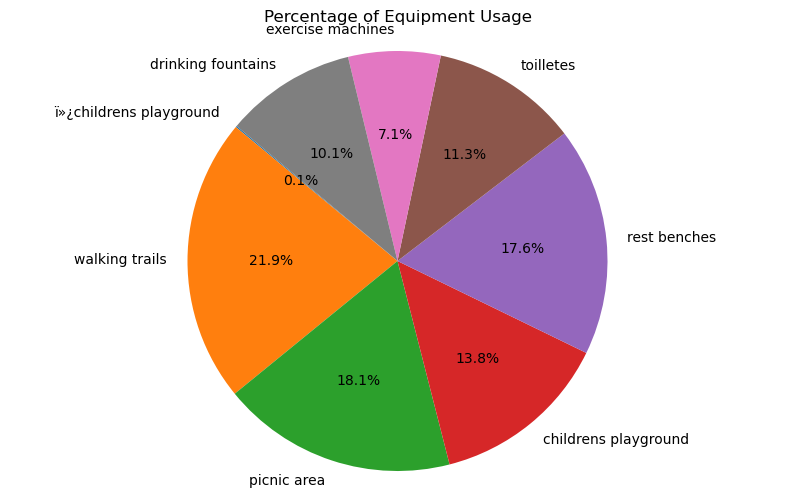

In [3]:
import csv
import matplotlib.pyplot as plt

# Function to read data from CSV file
def read_data(file_name):
    equipment_list = []
    with open(file_name, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            equipment_list.extend(row)
    return equipment_list

# Function to count occurrences of each piece of equipment
def count_equipment_usage(equipment_list):
    equipment_count = {}
    for equipment in equipment_list:
        if equipment in equipment_count:
            equipment_count[equipment] += 1
        else:
            equipment_count[equipment] = 1
    return equipment_count

# Function to calculate percentage of usage for each piece of equipment
def calculate_percentage(equipment_count, total_users):
    equipment_percentage = {}
    for equipment, count in equipment_count.items():
        percentage = (count / total_users) * 100
        equipment_percentage[equipment] = round(percentage, 2)
    return equipment_percentage

# Function to create pie chart
def create_pie_chart(equipment_percentage):
    labels = equipment_percentage.keys()
    sizes = equipment_percentage.values()

    plt.figure(figsize=(10, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('Percentage of Equipment Usage')
    plt.show()

# Main function
def main():
    file_name = '../datasetsMATCP/EquipmentUsed.csv'
    equipment_list = read_data(file_name)
    total_users = len(equipment_list)
    equipment_count = count_equipment_usage(equipment_list)
    equipment_percentage = calculate_percentage(equipment_count, total_users)
    create_pie_chart(equipment_percentage)

if __name__ == "__main__":
    main()

### Análise e interpretação dos resultados:
Após a execução do código, foi gerado um gráfico de pizza representando a porcentagem de uso de cada equipamento do parque pelos usuários. Os resultados obtidos fornecem insights valiosos sobre as preferências dos visitantes em relação aos diferentes recursos disponíveis no parque.

- Drinking Fountains: 10.1%: Embora uma parte significativa dos usuários tenha utilizado bebedouros, esse equipamento apresenta uma menor taxa de utilização em comparação com outros recursos do parque.

- Exercise Machines: 7.1%: O uso de máquinas de exercício é relativamente baixo, indicando uma possível oportunidade de melhoria ou promoção desse recurso para aumentar sua utilização.

- Toiletes: 11.3%: As instalações sanitárias também têm uma taxa moderada de utilização, sugerindo que estão adequadas às necessidades dos visitantes, mas podem exigir manutenção regular para garantir seu bom funcionamento.

- Rest Benches: 17.6%: Bancos de descanso são bastante utilizados, o que indica que os visitantes apreciam áreas de descanso e relaxamento no parque.

- Picnic Area: 18.1%: A área de piquenique é uma das mais utilizadas, sugerindo que atividades ao ar livre, como piqueniques, são populares entre os frequentadores do parque.

- Walking Trails: 21.9%: As trilhas para caminhada são altamente populares, representando a maior parcela de uso entre todos os equipamentos. Isso sugere que os visitantes valorizam atividades de lazer ao ar livre, como caminhadas em meio à natureza.

- Children's Playground: 13.9%: Embora represente uma porcentagem menor em comparação com as trilhas para caminhada e a área de piquenique, o playground ainda é uma parte importante do parque, especialmente para famílias com crianças.

Assim, através deste gráfico é possivel identificar rapidamente quais equipamentos são mais populares entre os visitantes do parque e quais são menos utilizados. E assim a compreensão dos padrões pode auxiliar os gestores do parque a fazer escolhas embasadas sobre quais áreas de manutenção priorizar, identificar oportunidades de atualização ou implementação de novos equipamentos para atender às necessidades dos visitantes.


Podemos determinar a porcentagem de uso dos diferentes tipos de equipamentos no parque usando a seguinte fórmula:
$$
\text{Equipment Percentage} = \left( \frac{\text{Equipment Count}}{\text{Total Users}} \right) \times 100
$$

---

# US11

### Introdução:
Como um GSM (Funcionário de Gestão do Parque), tenho como objetivo obter insights abrangentes sobre os padrões de utilização do nosso parque, discernindo tendências entre diferentes demografias etárias. Para alcançar isso, integramos uma pesquisa de três perguntas dentro do nosso portal de usuário.

Faixa Etária: Os usuários são solicitados a especificar seu grupo etário, categorizando-se como crianças (até 15 anos), adultos (entre 16 e 65 anos) ou idosos (mais de 65 anos).
Recomendação: Os participantes indicam se recomendariam o parque para outros, com uma simples resposta 'Sim' ou 'Não'.
Frequência de Visitas ao Parque: Os usuários quantificam suas visitas mensais ao parque com uma entrada numérica.
Ao agregar respostas dessas perguntas da pesquisa, obtemos insights valiosos sobre os padrões de uso do parque segmentados por grupos etários. Especificamente, podemos determinar:

A distribuição de recomendações de parque entre diferentes demografias etárias.
Proporções de usuários de cada faixa etária que endossam o parque.
Análise da frequência de visitas ao parque em diferentes grupos etários.
Essa compreensão abrangente capacita a gestão do parque a adaptar comodidades, serviços e esforços de divulgação para melhor atender às diversas necessidades dos visitantes do nosso parque.
___

### Código e Resultados:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura do arquivo CSV
df = pd.read_csv("../datasetsMATCP/Inquiry.csv", delimiter=';')

# 1- Indicação do tipo de cada uma das três variáveis
print("Tipos de variáveis")
print("Idade:")
print(df['Escalao'].value_counts())
print("\nRecomendaria o parque para outros:")
print(df['Y/N'].value_counts())
print("\nFrequência de visitas ao parque por mês:")
print(df['Visits'].describe())

# 2- Proporção de usuários de cada faixa etária que recomendaria o parque
recommendation_counts = df.groupby('Escalao')['Y/N'].value_counts(normalize=True)[:, 'Y']
print("\nProporção de usuários de cada faixa etária que recomendaria o parque:")
print(recommendation_counts)

# 3- Criação de boxplot para cada faixa etária, referente à frequência mensal de uso do parque
plt.figure(figsize=(8, 6))
df.boxplot(column='Visits', by='Escalao', grid=False)
plt.title('Boxplot da Frequência Mensal de Visita ao Parque por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Frequência Mensal de Visita ao Parque')
plt.suptitle('')
plt.show()

Tipos de variáveis
Idade:
Escalao
3    187
2    182
1    131
Name: count, dtype: int64

Recomendaria o parque para outros:
Y/N
N    254
Y    246
Name: count, dtype: int64

Frequência de visitas ao parque por mês:
count    500.00000
mean       4.92600
std        2.90334
min        1.00000
25%        2.00000
50%        5.00000
75%        7.00000
max       12.00000
Name: Visits, dtype: float64

Proporção de usuários de cada faixa etária que recomendaria o parque:
Escalao
1    0.473282
2    0.543956
3    0.454545
Name: proportion, dtype: float64


<Figure size 800x600 with 0 Axes>

### Análise e interpretação dos resultados:

**Tipos de Variáveis:**
Observamos que a variável "Idade" (Escalão) é dividida em três categorias: crianças (1), adultos (2) e idosos (3).
A variável "Recomendaria o parque para outros" (Y/N) é binária, com valores 'Sim' (Y) e 'Não' (N).
A frequência de visitas ao parque por mês (Visits) é uma variável numérica contínua.

**Recomendação do Parque:**
Notamos que há uma quase equivalência na proporção de usuários que recomendariam o parque para outros, com 246 usuários (49.2%) indicando 'Sim' (Y) e 254 usuários (50.8%) indicando 'Não' (N).

**Frequência de Visitas ao Parque:**
A análise da frequência de visitas ao parque revela que, em média, os participantes realizam aproximadamente 4.93 visitas por mês, com um desvio padrão de 2.90.
A mediana (valor central) da frequência de visitas é de 5 visitas por mês, sugerindo uma distribuição relativamente equilibrada das frequências.

**Proporção de Usuários por Faixa Etária que Recomendaria o Parque:**
Ao examinarmos a proporção de usuários de cada faixa etária que recomendaria o parque, observamos que a faixa etária de adultos (2) apresenta a maior proporção de recomendação, com aproximadamente 54.4%, seguida pela faixa etária de crianças (1) com 47.3% e pela faixa etária de idosos (3) com 45.5%.

A proporção de recomendação de cada grupo é calculada usando esta fórmula:
$$p = \frac{x}{n}$$
$$ x\text{ - número de resultados favoráveis}$$
$$ n\text{ - número total de resultados}$$

**Análise do Gráfico de Frequência de Visitas por Faixa Etária:**
O gráfico sugere que, em média, os idosos realizam mais visitas ao parque do que os adultos, e estes, por sua vez, realizam mais visitas do que as crianças.
Essa tendência pode indicar diferentes padrões de uso do parque por faixa etária, o que pode ser útil para orientar estratégias de gestão e marketing direcionadas a públicos específicos.

---

### Contribuição de cada membro:
- Daniel Silva 1231046 - 25%
- Igor Coutinho 1230543 - 25%
- Rafael Barbosa 1230544 - 25%
- Samara Miranda 1230432 - 25%